<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Описание-данных" data-toc-modified-id="Описание-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Описание данных</a></span></li><li><span><a href="#Изучаем-общую-информацию" data-toc-modified-id="Изучаем-общую-информацию-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Изучаем общую информацию</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Исследовательский-анализ" data-toc-modified-id="Исследовательский-анализ-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Вывод</a></span></li></ul></div>

# Проект - Анализ данных медицинского центра

# Описание проекта

В рамках проекта вы поработаете с реальными сырыми данными от одного медицинского центра.

Требуется: 
- оценить вклад различных факторов в изменение средней стоимости лечения в медицинской клинике в разные годы;
- проанализировать изменение выручки медицинского центра в 2022 году относительно 2021;
- выявить ключевые факторы, повлиявшие на это изменение.

## Описание данных

В нашем распоряжении датасет data_test_task_2022.xlsx. Файл хранит записи о посещении пациентами медицинского центра.

Структура датасета data_test_task_2022.xlsx:

    * record_id - уникальный индификатор записи на прием
    * service_date - дата посещения
    * service_name - наименования оказанных услуг
    * service_amount - сумма услуги
    * service_number - номер оказанной услуги
    * insured - номер страховки
    * sex_id - пол пациента (1 - мужчина, 2 - женщина)
    * age_for_service_date - возраст пациента

## Изучаем общую информацию

**Импортируем библиотеки**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats as st
import matplotlib.pyplot as plt
import datetime as dt
import re

**Импортируем данные в датасет**

In [2]:
df = pd.read_excel('data_test_task_2022.xlsx')

**Просмотрим первые 20 строк таблицы с данными и общую информацию о датасете**

In [3]:
df.head(20)

,record_id,service_date,service_name,service_amount,service_number,insured,sex_id,age_for_service_date
0,30268157003,2021-01-24,Прием первичный,1470,1,490777,2.0,26
1,30268157103,2021-01-24,"Взятие материала на посев, цитологическое иссл...",284,1,490777,2.0,26
2,30268157203,2021-01-24,"Посев отдел, дыхательных путей - слизистая зев...",1134,1,490777,2.0,26
3,30268157303,2021-01-24,"Общий анализ крови (лейкоцитарная форм,, СОЭ)",693,1,490777,2.0,26
4,30268157403,2021-01-24,Ревматоидный фактор,420,1,490777,2.0,26
5,30268157503,2021-01-24,С-реактивный белок,420,1,490777,2.0,26
6,30268157603,2021-01-24,Взятие крови из периферической вены,158,1,490777,2.0,26
7,30268157703,2021-01-26,Прием первичный,1470,1,490777,2.0,26
8,30268157803,2021-01-26,Магнитотерапия (1 сеанс),1040,1,490777,2.0,26
9,30268157903,2021-01-26,УВЧ-терапия (1 сеанс) (1 поле),1040,1,490777,2.0,26


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85369 entries, 0 to 85368
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   record_id             85369 non-null  int64  
 1   service_date          85369 non-null  object 
 2   service_name          85369 non-null  object 
 3   service_amount        85369 non-null  int64  
 4   service_number        85369 non-null  int64  
 5   insured               85369 non-null  int64  
 6   sex_id                85348 non-null  float64
 7   age_for_service_date  85369 non-null  int64  
dtypes: float64(1), int64(5), object(2)
memory usage: 5.2+ MB


**Посмотрим пропущенные значения**

In [5]:
df.isna().sum()

record_id                0
service_date             0
service_name             0
service_amount           0
service_number           0
insured                  0
sex_id                  21
age_for_service_date     0
dtype: int64

**Изучим подробнее строки с пропусками**

In [6]:
df.query('sex_id != 1.0 and sex_id != 2.0')

,record_id,service_date,service_name,service_amount,service_number,insured,sex_id,age_for_service_date
4411,30489299203,2021-03-18,Прием первичный,1470,1,512590,NaN,26
4412,30489299303,2021-03-27,"Общий анализ крови (лейкоцитарная форм,, СОЭ)",693,1,512590,NaN,26
4413,30489299403,2021-03-27,Общий анализ мочи,431,1,512590,NaN,26
4414,30489299503,2021-03-27,Альфа-амилаза панкреатическая,287,1,512590,NaN,26
4415,30489299603,2021-03-27,АЛТ (аланинаминотрансфераза),278,1,512590,NaN,26
4416,30489299703,2021-03-27,АСТ (аспартатаминотрансфераза),242,1,512590,NaN,26
4417,30489299803,2021-03-27,Билирубин общий,287,1,512590,NaN,26
4418,30489299903,2021-03-27,ГГТ (гамма - глютамилтрансфераза),287,1,512590,NaN,26
4419,30489300003,2021-03-27,Глюкоза крови,273,1,512590,NaN,26
4420,30489300103,2021-03-27,Фосфотаза щелочная,287,1,512590,NaN,26


**Посмотрим в процентном соотношении**

In [7]:
df.isna().mean()*100

record_id               0.000000
service_date            0.000000
service_name            0.000000
service_amount          0.000000
service_number          0.000000
insured                 0.000000
sex_id                  0.024599
age_for_service_date    0.000000
dtype: float64

**Для наглядности построим гистограммы по данным датафрейма**

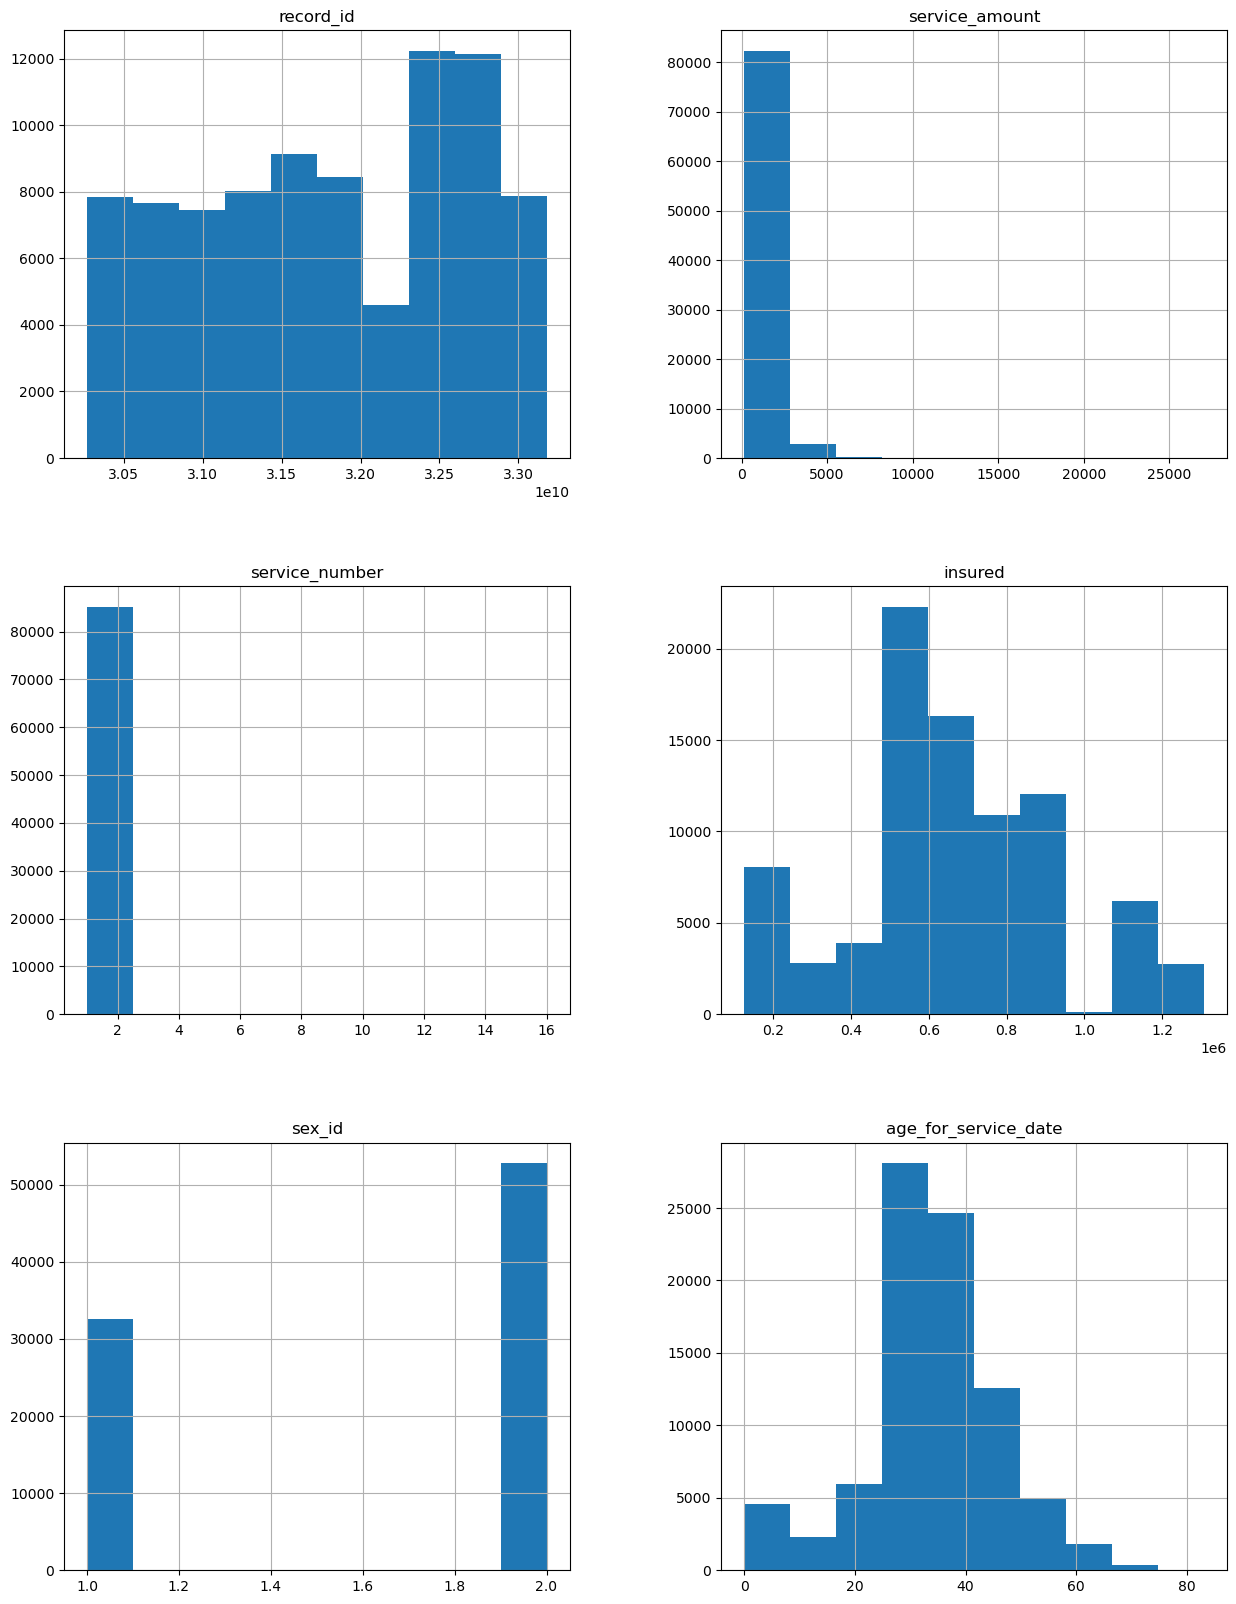

In [8]:
df.hist(figsize=(15, 20)); 

## Предобработка данных

**Сделаем настройки отображения**

In [9]:
pd.options.display.float_format = '{:,.2f}'.format

**Приведём формат даты и времени к удобному виду**

In [10]:
df['service_date'] = pd.to_datetime(df['service_date'])
df['month']= pd.to_datetime(df['service_date']).dt.strftime('%Y-%m')
df['year'] = pd.to_datetime(df['service_date']).dt.strftime('%Y')

**Уберем в столобце service_name лишние запятые**

In [11]:
df['service_name'] = df['service_name'].replace(',,', ',', regex = True)

**Приведем значения в колонке service_name к нижнему регистру для удобства**

In [12]:
df['service_name'] = df['service_name'].str.lower()

**Проверим данные**

In [13]:
def inspect(df):
    display(df.head(10)) 
    df.info() 
    print ('Количество дубликатов -', df.duplicated().sum())
    numeric_columns=df.describe().columns
    display(df.describe())
    display()
    df.columns = [x.lower().replace(' ', '_') for x in df.columns.values]
    for column_name in df.columns:
        if column_name not in numeric_columns:
            if 'session' in column_name or 'dt' in column_name:
                df[column_name] = pd.to_datetime(df[column_name])
            else:
                display(df[column_name].value_counts())
                print(50*'*')
    return df
df = inspect(df)

,record_id,service_date,service_name,service_amount,service_number,insured,sex_id,age_for_service_date,month,year
0,30268157003,2021-01-24,прием первичный,1470,1,490777,2.00,26,2021-01,2021
1,30268157103,2021-01-24,"взятие материала на посев, цитологическое иссл...",284,1,490777,2.00,26,2021-01,2021
2,30268157203,2021-01-24,"посев отдел, дыхательных путей - слизистая зев...",1134,1,490777,2.00,26,2021-01,2021
3,30268157303,2021-01-24,"общий анализ крови (лейкоцитарная форм, соэ)",693,1,490777,2.00,26,2021-01,2021
4,30268157403,2021-01-24,ревматоидный фактор,420,1,490777,2.00,26,2021-01,2021
5,30268157503,2021-01-24,с-реактивный белок,420,1,490777,2.00,26,2021-01,2021
6,30268157603,2021-01-24,взятие крови из периферической вены,158,1,490777,2.00,26,2021-01,2021
7,30268157703,2021-01-26,прием первичный,1470,1,490777,2.00,26,2021-01,2021
8,30268157803,2021-01-26,магнитотерапия (1 сеанс),1040,1,490777,2.00,26,2021-01,2021
9,30268157903,2021-01-26,увч-терапия (1 сеанс) (1 поле),1040,1,490777,2.00,26,2021-01,2021


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85369 entries, 0 to 85368
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   record_id             85369 non-null  int64         
 1   service_date          85369 non-null  datetime64[ns]
 2   service_name          85369 non-null  object        
 3   service_amount        85369 non-null  int64         
 4   service_number        85369 non-null  int64         
 5   insured               85369 non-null  int64         
 6   sex_id                85348 non-null  float64       
 7   age_for_service_date  85369 non-null  int64         
 8   month                 85369 non-null  object        
 9   year                  85369 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(5), object(3)
memory usage: 6.5+ MB
Количество дубликатов - 0


,record_id,service_amount,service_number,insured,sex_id,age_for_service_date
count,"85,369.00","85,369.00","85,369.00","85,369.00","85,348.00","85,369.00"
mean,"31,799,826,572.25","1,166.09",1.02,"654,916.29",1.62,33.85
std,"837,064,983.00",799.06,0.23,"262,335.58",0.49,12.14
min,"30,268,157,003.00",147.00,1.00,"125,073.00",1.00,0.00
25%,"31,111,934,803.00",550.00,1.00,"509,690.00",1.00,27.00
50%,"31,814,131,003.00","1,155.00",1.00,"651,895.00",2.00,34.00
75%,"32,511,163,303.00","1,530.00",1.00,"822,728.00",2.00,41.00
max,"33,178,147,203.00","26,999.00",16.00,"1,306,795.00",2.00,83.00


2022-05-24    344
2022-06-08    333
2022-05-11    314
2022-06-06    307
2022-06-01    306
             ... 
2021-01-11     43
2021-02-14     42
2021-01-10     40
2021-02-21     37
2021-12-31     29
Name: service_date, Length: 602, dtype: int64

**************************************************


прием первичный                                                                                           6058
прием повторный                                                                                           4477
взятие крови из периферической вены                                                                       4215
общий анализ крови (лейкоцитарная форм, соэ)                                                              3190
магнитотерапия (1 сеанс)                                                                                  2838
                                                                                                          ... 
respiratory syncyt, virus igg                                                                                1
respiratory syncyt, virus igm                                                                                1
доплерометрия при нейросонографии                                                                            1
э

**************************************************


2022-04    6692
2022-05    6374
2022-06    5765
2022-03    5547
2021-10    5065
2022-07    4841
2022-02    4586
2021-12    4288
2021-09    4229
2022-01    4143
2021-11    4074
2021-06    3915
2021-04    3869
2021-05    3788
2021-08    3782
2021-03    3696
2021-07    3545
2022-08    3029
2021-02    2120
2021-01    2021
Name: month, dtype: int64

**************************************************


2021    44392
2022    40977
Name: year, dtype: int64

**************************************************


**Удалим в столбце sex_id строки с пустыми значениями. Количество удаленных строк не повлияет на общий результаты анализа**

In [14]:
df.dropna(subset=['sex_id'], axis=0, inplace=True)

**Проверим результат**

In [15]:
df.isna().sum()

record_id               0
service_date            0
service_name            0
service_amount          0
service_number          0
insured                 0
sex_id                  0
age_for_service_date    0
month                   0
year                    0
dtype: int64

**Проверим столбец age_for_service_date на нулевые значения**

In [16]:
df.loc[df['age_for_service_date'] == 0].count()

record_id               402
service_date            402
service_name            402
service_amount          402
service_number          402
insured                 402
sex_id                  402
age_for_service_date    402
month                   402
year                    402
dtype: int64

Пустые строки в столбце age_for_service_date где не указан возраст также предлагаю удалить, чтобы данные не выбивались из общих значений. Количество строк 402, что тоже не должно повлиять на общие выводы.

**Удаляем строки**

In [17]:
df = df[df['age_for_service_date'] != 0]

**Проверим**

In [18]:
df.query('age_for_service_date == 0')

,record_id,service_date,service_name,service_amount,service_number,insured,sex_id,age_for_service_date,month,year


**Убираем в столбце service_name лишние пробелы**

In [19]:
for col in ['service_name']:
    df['service_name'] = df['service_name'].replace("\s+", " ", regex=True).str.strip()

**Удалим из столбца service_name лишние пробелы, которые могут встречаются в начале и в конце строки**

In [20]:
df['service_name'] = df['service_name'].str.strip()

In [21]:
df['service_name'].unique()

array(['прием первичный',
       'взятие материала на посев, цитологическое исследование ( риноцитограмма)',
       'посев отдел, дыхательных путей - слизистая зева с определением чувствительности к антибиотикам',
       'общий анализ крови (лейкоцитарная форм, соэ)',
       'ревматоидный фактор', 'с-реактивный белок',
       'взятие крови из периферической вены', 'магнитотерапия (1 сеанс)',
       'увч-терапия (1 сеанс) (1 поле)', 'прием повторный',
       'смазывание глотки лекарственными формами', 'взятие мазка',
       'обработка вульвы', 'обработка шейки матки',
       'гинекологический мазок', 'общий анализ мочи', 'креатинин',
       'мочевая кислота', 'мочевина', 'общий белок',
       'ультразвуковое исследование почек и надпочечников',
       'ультразвуковое исследование мочевого пузыря',
       'лпнп (липопротеиды низкой плотности, бета-липопротеиды)',
       'триглицериды', 'холестерин', 'алт (аланинаминотрансфераза)',
       'альдостерон', 'кортизол (кровь)', 'ренин + ангиот

**Заменяем строковой тип данных в service_amount на целочисленный**

In [22]:
df['service_amount'] = df['service_amount'].astype('int')

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84946 entries, 0 to 85368
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   record_id             84946 non-null  int64         
 1   service_date          84946 non-null  datetime64[ns]
 2   service_name          84946 non-null  object        
 3   service_amount        84946 non-null  int32         
 4   service_number        84946 non-null  int64         
 5   insured               84946 non-null  int64         
 6   sex_id                84946 non-null  float64       
 7   age_for_service_date  84946 non-null  int64         
 8   month                 84946 non-null  object        
 9   year                  84946 non-null  object        
dtypes: datetime64[ns](1), float64(1), int32(1), int64(4), object(3)
memory usage: 6.8+ MB


## Исследовательский анализ

**Просмотрим как изменилась цена**

In [24]:
# вычислим среднюю стоимость услуг по годам
price_by_year = df.groupby('year', as_index=False)['service_amount'].mean().round(2).T
difference = round(((price_by_year.loc['service_amount', 1] - price_by_year.loc['service_amount', 0]) / price_by_year.loc['service_amount', 0]) * 100, 2)

display(price_by_year)
print()
print(f'Средняя цена за 2022 относительно 2021 изменилась на {difference}%')

,0,1
year,2021,2022
service_amount,"1,138.32","1,195.12"



Средняя цена за 2022 относительно 2021 изменилась на 4.99%


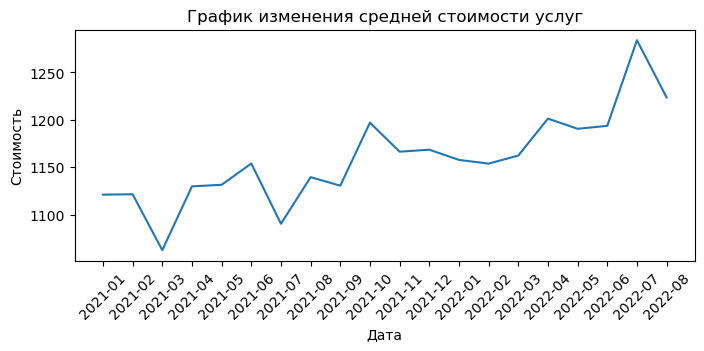

In [25]:
# построим график изменения цены по месяцам
mean_price = df.groupby('month', as_index=False)['service_amount'].mean()

plt.figure(figsize=(8, 3))
sns.lineplot(x = 'month', y = 'service_amount', data = mean_price)
plt.xticks(rotation = 45)
plt.title('График изменения средней стоимости услуг')
plt.xlabel('Дата')
plt.ylabel('Стоимость')
plt.show()

На графике видно, что данные за 2022 год есть только за 8 месяцев. Считаю, что нужно будет сравнивать данные только за первые 8 месяцев и 2021 года.

**Проверим увеличение средней стоимости обслуживания пациентов из-за изменения цен на услуги**

In [26]:
# разделим данные по годам и оставим в 2021 только первые 8 месяцев
df_2021 = df[df['year'] == '2021']
df_2021 = df[df['month'] < '2021-09'] 

df_2022 = df[df['year'] == '2022']

In [27]:
# создадим таблицы с ценами на услуги за 2021 и 2022 года
mean_price_2021 = df_2021.groupby('service_name', as_index=False)['service_amount'].mean()
display(mean_price_2021.head(10))

mean_price_2022 = df_2022.groupby('service_name', as_index=False)['service_amount'].mean()
display(mean_price_2022.head(10))

,service_name,service_amount
0,"(б1 (11))аллергопанель ige шерсть кошки, шерст...","1,449.00"
1,25-oh витамин d (25-гидроксихолекальциферол),"3,255.00"
2,bordetella pertussis (слюна),462.00
3,candida albicans (соскоб),378.00
4,chlamydia pneumoniae iga,599.00
5,chlamydia pneumoniae igg,599.00
6,chlamydia pneumoniae igm,599.00
7,chlamydia trachomatis (соскоб),378.00
8,chlamydia trachomatis igg,599.00
9,chlamydia trachomatis igm,599.00


,service_name,service_amount
0,"(1 e)аллергопанель ige (молоко коровье, молоко...","1,520.00"
1,"(2 e)аллергопанель ige (пшеничная мука, ржаная...","1,520.00"
2,"(3 e)аллергопанель ige (фасоль (бобы), горох, ...","1,520.00"
3,"(4 e)аллергопанель ige (говядина, телятина, св...","1,520.00"
4,"(б1 (11))аллергопанель ige шерсть кошки, шерст...","1,520.00"
5,17-oh - гидроксипрогестерон,610.00
6,25-oh витамин d (25-гидроксихолекальциферол),"3,420.00"
7,ascaris igg,830.00
8,bordetella (pertusis) iga,970.00
9,bordetella (pertusis) igg,670.00


In [28]:
# объединим таблицы с ценами по наименованию услуг
price_difference_table = mean_price_2021.merge(mean_price_2022, how='inner', on='service_name')
price_difference_table.columns = ['service_name', 'price_2021', 'price_2022']

# посчитаем разницу в процентах
price_difference_table['difference, %'] = ((price_difference_table['price_2022'] - price_difference_table['price_2021']) / price_difference_table['price_2021']) * 100

price_difference = round(price_difference_table['difference, %'].mean(), 2)

display(price_difference_table.head(10))
print()
print(f'В среднем, цена в 2022 году на те же услуги выше на {price_difference}%, чем в 2021')

,service_name,price_2021,price_2022,"difference, %"
0,"(б1 (11))аллергопанель ige шерсть кошки, шерст...","1,449.00","1,520.00",4.90
1,25-oh витамин d (25-гидроксихолекальциферол),"3,255.00","3,420.00",5.07
2,chlamydia pneumoniae igg,599.00,690.00,15.19
3,chlamydia pneumoniae igm,599.00,660.00,10.18
4,chlamydia trachomatis (соскоб),378.00,400.00,5.82
5,chlamydia trachomatis igg,599.00,630.00,5.18
6,cmv (цитомегаловирус) (кровь),378.00,400.00,5.82
7,cmv (цитомегаловирус) (слюна),378.00,400.00,5.82
8,cmv (цитомегаловирус) (соскоб),378.00,400.00,5.82
9,cytomegalovirus igg,599.00,660.00,10.18



В среднем, цена в 2022 году на те же услуги выше на 5.75%, чем в 2021


**Возможно, что средняя стоимость обслуживания изменилась из-за того, что поциенты стали чаще посещать медцентр**

Проверим, изменилось ли среднне количество посещений клиники на одного человека. Также, можно посмотреть медианное значение, чтобы исключить людей с более обширной программой лечения.

In [29]:
services_count_2021 = df_2021.groupby('insured')['service_name'].count()

print(services_count_2021.mean())
print(services_count_2021.median())

15.435212085996513
8.0


In [30]:
services_count_2022 = df_2022.groupby('insured')['service_name'].count()

print(services_count_2022.mean())
print(services_count_2022.median())

14.882974845060152
8.0


Значительных изменений нет. Есть небольшое снижение в 2022 году. Проверим статистически значимую разницу.

1. Интенсивность за 2021 и 2022 годы схожа.

2. Интенсивность за 2021 и 2022 годы различается.

In [31]:
results = st.ttest_ind(services_count_2021, services_count_2022)
alpha = 0.07

print(results.pvalue)
if results.pvalue < alpha:
    print('Интенсивность за 2021 и 2022 годы различается')
else:
    print('Интенсивность за 2021 и 2022 годы схожа')

0.33434280863646915
Интенсивность за 2021 и 2022 годы схожа


Тут видно, что разницы в изменении интенсивности лечения в 2022 году нет. Значит, на цены это повлияло.

**Cгруппируем данные по пациентам с указанием пола и возраста**

In [32]:
people_age_21 = df_2021.groupby('insured', as_index=False)[['sex_id', 'age_for_service_date']].mean()
people_age_22 = df_2022.groupby('insured', as_index=False)[['sex_id', 'age_for_service_date']].mean()

**Определим, изенились ли доли пациентов по полу**

In [33]:
pd.options.display.float_format = '{:,.4f}'.format

In [34]:
print('Доли в 2021 году:')
print(people_age_21['sex_id'].value_counts(normalize=True))

print('--------------------------------')

print('Доли в 2022 году:')
print(people_age_22['sex_id'].value_counts(normalize=True))

Доли в 2021 году:
2.0000   0.5822
1.0000   0.4178
Name: sex_id, dtype: float64
--------------------------------
Доли в 2022 году:
2.0000   0.5793
1.0000   0.4207
Name: sex_id, dtype: float64


Совсем незначительное изменение в сторону увеличения числа мужчин пациентов и снижения женщин пациэнтов.

**Проверим разницу в возрасте**

In [35]:
people_age_21['age_for_service_date'].describe()

count   1,721.0000
mean       31.0556
std        13.4601
min         1.0000
25%        25.0000
50%        32.0000
75%        39.0000
max        83.0000
Name: age_for_service_date, dtype: float64

In [36]:
people_age_22['age_for_service_date'].describe()

count   2,743.0000
mean       32.1007
std        12.3004
min         1.0000
25%        26.0000
50%        33.0000
75%        39.0000
max        75.0000
Name: age_for_service_date, dtype: float64

**Постороим график распределения возрастов**

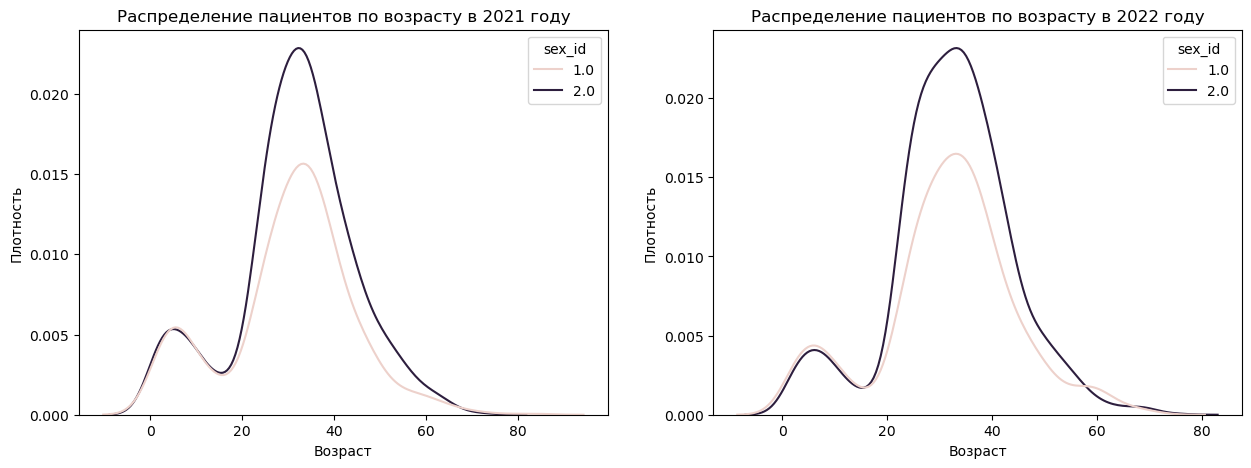

In [37]:
plt.figure(figsize=(15, 5))
ax1 = plt.subplot(1, 2, 1)
sns.kdeplot(x='age_for_service_date', hue='sex_id', data = people_age_21)
plt.title('Распределение пациентов по возрасту в 2021 году')
plt.xlabel('Возраст')
plt.ylabel('Плотность')

ax2 = plt.subplot(1, 2, 2)
sns.kdeplot(x='age_for_service_date', hue='sex_id', data = people_age_22)
plt.title('Распределение пациентов по возрасту в 2022 году')
plt.xlabel('Возраст')
plt.ylabel('Плотность')
plt.show()

Сильных изменений нет. Средний возраст увеличился на 1 год. Нужно проверить, есть ли статистически значимая разница.

1. Статистически значимой разницы в возрасте пациентов за 2021 и 2022 годы нет

2. Статистически значимая разница в возрасте пациентов за 2021 и 2022 годы есть

In [38]:
results = st.ttest_ind(people_age_21['age_for_service_date'], people_age_22['age_for_service_date'])
alpha = 0.07

print(results.pvalue)
if results.pvalue < alpha:
    print('Разница за 2021 и 2022 годы есть')
else:
    print('Разницы за 2021 и 2022 годы нет')

0.007764117177562978
Разница за 2021 и 2022 годы есть


Как видим, разница есть. Нужно проверить как возраст влияет на стоимость обслуживания.

In [39]:
print(df_2021['age_for_service_date'].corr(df_2021['service_amount']))

0.025886473681252898


Разниа в возрасте имеется, но нет никакой свзяи между возрастом и стоимостью обслуживания.

**Проверим, увеличилась ли средняя стоимость обслуживания пациентов из-за изменения структуры оказываемых услуг. Т.е., увеличилась ли цена или снизилась и наоброт**

In [40]:
# разделим стоимости услуг на диапазоны
def price_group(price):
    
    if price <= 1000:
        return '0-1000'
    if price <= 2000:
        return '1000-2000'
    if price <= 3000:
        return '2000-3000'
    if price <= 4000:
        return '3000-4000'
    if price <= 5000:
        return '4000-5000'
    if price > 5000:
        return 'более 5000'

In [41]:
pd.options.mode.chained_assignment = None
df_2021['price_group'] = df_2021['service_amount'].apply(price_group)
df_2022['price_group'] = df_2022['service_amount'].apply(price_group)

**Сгруппируем данные по ценовым диапазонам и посчитаем количество**

In [42]:
price_category_2021 = df_2021.groupby('price_group', as_index=False)['service_amount'].count()
price_category_2022 = df_2022.groupby('price_group', as_index=False)['service_amount'].count()

In [43]:
price_category = price_category_2021.merge(price_category_2022, how='inner', on='price_group')

# посчитаем доли каждой категории
price_category['proportion_2021'] = price_category['service_amount_x']/sum(price_category['service_amount_x'])
price_category['proportion_2022'] = price_category['service_amount_y']/sum(price_category['service_amount_y'])

# вычислим изменение
price_category['difference, %'] = ((price_category['proportion_2022'] - price_category['proportion_2021'])/price_category['proportion_2021'])*100

display(price_category)

,price_group,service_amount_x,service_amount_y,proportion_2021,proportion_2022,"difference, %"
0,0-1000,11794,16797,0.4440,0.4114,-7.3280
1,1000-2000,12540,20151,0.4721,0.4936,4.5627
2,2000-3000,1380,2611,0.0520,0.0640,23.1135
3,3000-4000,637,1021,0.0240,0.0250,4.2952
4,4000-5000,105,143,0.0040,0.0035,-11.3814
5,более 5000,108,101,0.0041,0.0025,-39.1479


**Построим график с пропорциями в катеогриях**

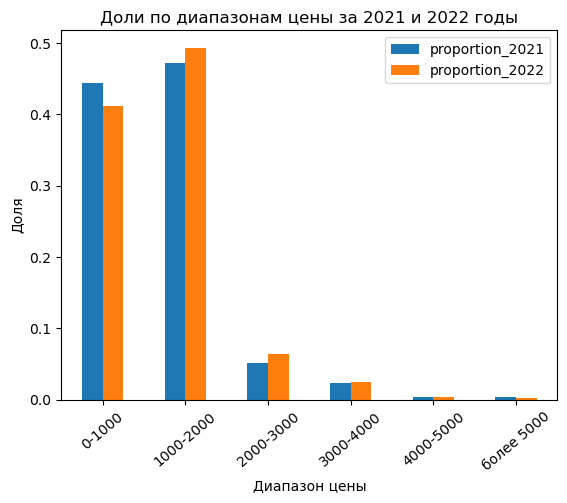

In [44]:
price_category.plot(kind='bar', x='price_group', y=['proportion_2021', 'proportion_2022'])
plt.legend(['proportion_2021', 'proportion_2022'])
plt.title('Доли по диапазонам цены за 2021 и 2022 годы')
plt.xlabel('Диапазон цены')
plt.ylabel('Доля')
plt.xticks(rotation=40)
plt.show()

Тут видно, что дорогих услуг стоимостью от 5000 рублей стало меньше. Значит, это не повлияло на изменение цен. 
Также видно, что стало меньше услуг стоимостью до 1000 рублей. 
В диапазоне от 1000 рублей до 4000 рублей услуг стало больше. В пределах от 2000 рублей до 3000 рублей также есть увеличение. Возможно, всё это могло повлиять на среднюю стоимость обслуживания пациентов.

## Вывод

Исходя из проведенного исследования, выснилось, что средняя стоимость обслуживания в клинике в 2022 году относительно 
2021 года увеличилась почти на 5%.

Было проверено несколько гипотез для выявления факторов, влияющих на изменение цен:

- Стоимость обслуживания увеличилась из-за изменением цен на услуги. В среднем, цена на одни и те же услуги увеличилась на 5.75%.


- Средняя стоимость обслуживания пациентов увеличилась из-за изменения структуры оказываемых услуг. Стало меньше услуг стоимостью до 1000 рублей. В диапазоне от 1000 рублей до 4000 рублей услуг стало больше. Однако заметно увеличилось число услуг в ценовом диапазоне от 1000 до 4000 рублей. Это могло повлиять на изменение стоимости обслуживания, так как они имеют большую долю в общем числе оказываемых услуг.


- Также, не подтвердилась гепотиза о том, что средняя стоимость обслуживания увеличилась из-за изменения интенсивности лечения по возрасту и полу пациентов.